### Use sciann kernel

In [1]:
import pandas as pd
import numpy as np

SciANN_df = pd.read_csv('SciANN_collected_info_varying_noise.csv')
SciANN_df['Tag'] = 'SciANN'

FBPINN_df = pd.read_csv('FBPINN_collected_info_varying_noise.csv')
FBPINN_df['Tag'] = 'FBPINN'

In [3]:
# Merge dataframes based on 'Time Limit', 'Noise Level', and 'Model Type'
merged_df = pd.merge(SciANN_df, FBPINN_df, on=['Time Limit', 'Noise Level', 'Model Type'], suffixes=('_SciANN', '_FBPINN'))

merged_df = merged_df.rename(columns={
    'MSE Learned_SciANN': 'PINN_MSE Learned',
    'MSE Test_SciANN': 'PINN_MSE Test',
    'Learned Parameters_SciANN': 'PINN_Learned Parameters',
    'MSE Learned_FBPINN': 'FBPINN_MSE Learned',
    'MSE Test_FBPINN': 'FBPINN_MSE Test',
    'Learned Parameters_FBPINN': 'FBPINN_Learned Parameters'
})

merged_df = merged_df.drop(columns=['Tag_SciANN', 'Tag_FBPINN'])

assert merged_df.shape[0] == SciANN_df.shape[0] == FBPINN_df.shape[0]

merged_df.head()


,Time Limit,Noise Level,PINN_MSE Learned,PINN_MSE Test,Model Type,PINN_Learned Parameters,FBPINN_MSE Learned,FBPINN_MSE Test,FBPINN_Learned Parameters
0,0-10,0.01,0.000003,0.000004,sg,0.9983711963700482,0.000003,0.000003,0.9984
1,0-10,0.02,0.000012,0.000017,sg,0.9966552526428825,0.000010,0.000013,0.9969
2,0-10,0.03,0.000028,0.000043,sg,0.9948808386121102,0.000022,0.000030,0.9955
3,0-10,0.04,0.000048,0.000064,sg,0.9932222502643883,0.000046,0.000056,0.9934
4,0-10,0.05,0.000074,0.000109,sg,0.9916172260136206,0.000076,0.000092,0.9915


In [4]:
# extract model type as 'coexistence' in a df with restarting the index from 0
coexistence_df = merged_df[merged_df['Model Type'] == 'coexistence'].reset_index(drop=True)
coexistence_df.head()

,Time Limit,Noise Level,PINN_MSE Learned,PINN_MSE Test,Model Type,PINN_Learned Parameters,FBPINN_MSE Learned,FBPINN_MSE Test,FBPINN_Learned Parameters
0,0-10,0.01,0.000027,0.000024,coexistence,[0.41487645 0.69311585 0.30744681 0.28807044 0...,0.000027,0.000028,[0.5159 0.6992 0.3007 0.2909 0.6112]
1,0-10,0.02,0.000146,0.000141,coexistence,[0.34065979 0.68468228 0.316604 0.27963363 0...,0.000150,0.000156,[0.5452 0.701 0.2988 0.2802 0.625 ]
2,0-10,0.03,0.000481,0.000475,coexistence,[0.2627941 0.67632959 0.32578135 0.2723352 0...,0.000202,0.000214,[0.5425 0.6988 0.3013 0.2726 0.633 ]
3,0-10,0.04,0.001110,0.001110,coexistence,[0.19279666 0.66781519 0.33483563 0.26363642 0...,0.000404,0.000431,[0.5662 0.6993 0.3006 0.2614 0.6467]
4,0-10,0.05,0.002286,0.002312,coexistence,[0.12678027 0.65936626 0.34387411 0.25044953 0...,0.000692,0.000738,[0.59 0.6991 0.3004 0.2486 0.662 ]


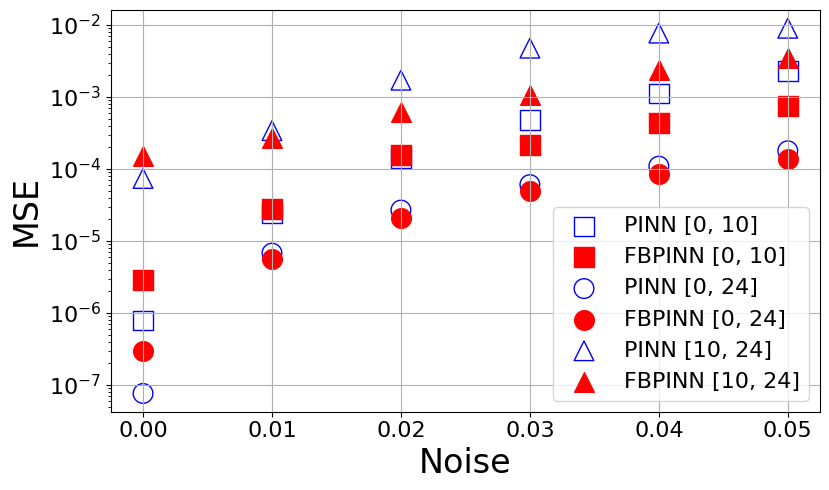

In [5]:
import matplotlib.pyplot as plt
import tikzplotlib

def change_formate(x = '0-10'):
    x = x.split('-')
    x = [int(i) for i in x]
    return x

markers = ['s', 'o', '^', 'd', 'v', '<', '>']  
time_limits = coexistence_df['Time Limit'].unique() 

plt.figure(figsize=(8.4, 5))
plt.grid(True)

for i, time_limit in enumerate(time_limits):
    time_limit_df = coexistence_df[coexistence_df['Time Limit'] == time_limit]
    
    plt.scatter(time_limit_df['Noise Level'], time_limit_df['PINN_MSE Test'], 
                label=f'PINN {change_formate(time_limit)}', color='blue', marker=markers[i], facecolors='none', s=100*2)
    
    plt.scatter(time_limit_df['Noise Level'], time_limit_df['FBPINN_MSE Test'], 
                label=f'FBPINN {change_formate(time_limit)}', color='red', marker=markers[i], s=100*2)


plt.xlabel('Noise', fontsize=24)
plt.ylabel(r'MSE', fontsize=24)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.yscale('log')

plt.legend(fontsize=16)
plt.tight_layout()
# plt.show()
tikzplotlib.save('Coexistence_Noise_Comparison.tex')
# plt.savefig('Coexistence_Noise_Comparison.png')
